## PROBLEM STATEMENT
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>
The company requires  a model wherein you there is assigned  lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Steps:
- Data inspection and cleaning
- Outlier treatment
- EDA: univariate and bivariate analysis
- Creating dummies
- Train test split
- Scaling
- Building and fitting a Model
- Feature selection through RFE
- Again fitting the model to selected features
- Dropping columns with higher p values and VIFs 
- Again fitting the model with appropiate variables
- Plotting the ROC Curve
- Finding Optimal Cutoff Point

<b> Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### 1.Data inspection and cleaning

In [3]:
# reading the dataset
pd.set_option('display.max_columns', None) 
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.set_index('Lead Number',inplace=True)

In [6]:
df.shape

(9240, 36)

In [7]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


After describing we can see that:
- TotalVisits column have outliers 
- Total Time Spent on Website column have outliers
- Page Views Per Visit have outliers
- Other variables are not affected by outliers

In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

<B> REPALCING THE VALUES 'Select' WHICH IS PRESENT IN MANY COLUMNS WITH np.NaN BECAUSE IT IS EQUIVALENT TO NULL.

In [9]:
df=df.replace('Select',np.NaN)

### Missing Values Treatment

In [10]:
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

REMOVING COLUMNS WITH MORE THAN 40% MISSING VALUES AS THERE ARE MANY COLUMNS WITH NULL VALUES AND DELETING COLUMNS WITH MORE THAN 30% MISSING VALUES WOULD BE INAPPROPIATE BECAUSE THE VARIABLES 'CITY' , 'TAGS' ,'SPECIALIZATION' SEEMS TO BE IMPORTANT.


In [11]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'
        ,'Lead Quality','How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [12]:
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Looking at different columns to deal with their null values

#### Lead Source

In [13]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

there are many values with very less values, so replacing them with 'others'

In [14]:
a=df['Lead Source'].value_counts()
df['Lead Source']=df['Lead Source'].apply(lambda x: 'Others' if x in a[a < 150].index else x)
df['Lead Source']=df['Lead Source'].fillna('Others')

#### TotalVisits

In [15]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

we can see there are outliers ,so replacing the null values with median.

In [16]:
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())

#### Page Views Per Visit

In [17]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

this column also have outliers ,so replacing null values with median.

In [18]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

#### Last Activity

In [19]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

replacing the less frequent values with others.

In [20]:
b = df['Last Activity'].value_counts()
df['Last Activity'] = df['Last Activity'].apply(lambda x: 'Others' if x in b[b < 120].index else x)
df['Last Activity'] = df['Last Activity'].fillna('Other_Activity')

#### Country

In [21]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
Netherlands                2
Italy                      2
Uganda                     2
China                      2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
Denmark                    1
Vietnam                    1
Liberia                    1
Indonesia                  1
Malaysia                   1
Switzerland   

Most of the leads are from <b>India</b> so ,filling the null values with India and replacing other values with 'Others' as they are less frequent

In [22]:
df['Country']=df['Country'].fillna('India')
df['Country']=df['Country'].apply(lambda x: 'Others' if x not in ['India'] else x)

In [23]:
df.Country.value_counts()

India     8953
Others     287
Name: Country, dtype: int64

#### Specialization

In [24]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Replacing null values with 'Not Specified' 

In [25]:
df['Specialization']=df['Specialization'].fillna('Not Specified')

#### What is your current occupation

In [26]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Most of the values are unemployed ,so replacing all the null values with unemployed and the values 'other' ,'Housewife' ,'Businessman' are very less , so grouping them as one 

In [27]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unemployed')
df['What is your current occupation']=df['What is your current occupation'].apply(lambda x: 'Others' if x in ['Other','Housewife','Businessman'] else x)

In [28]:
df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course

In [29]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

All the values are 'Better Career Prospects' and null ,so deleting this column would be best.

In [30]:
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

#### Tags

In [31]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Filling the null values with 'Not Specified' and grouping the less frequent values with 'Others'

In [32]:
df['Tags']=df['Tags'].fillna('Not Specified')

In [33]:
c=df['Tags'].value_counts()
df['Tags']=df['Tags'].apply(lambda x: 'Others' if x in c[c < 100].index else x)

#### City

In [34]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

as there are high number of missing values , so replacing the values with 'Not Specified'

In [35]:
df['City']=df['City'].fillna('Not Specified')

In [36]:
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

<B> INSPECTING OTHER COLUMNS 

#### Do Not Email

In [37]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [38]:
df.drop('Do Not Email',axis=1,inplace=True)

#### Do Not Call

In [39]:
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [40]:
df.drop('Do Not Call',axis=1,inplace=True)

#### Search

In [41]:
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [42]:
df.drop('Search',axis=1,inplace=True)

#### Magazine

In [43]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

THERE IS ONLY ONE VALUE IN THIS COLUMN WHICH SHOWS ALL THE LEADS ARE SAME IN THIS ,SO THIS COLUMN CAN NOT HELP IN ANALYSIS.

In [44]:
df.drop('Magazine',axis=1,inplace=True)

#### Newspaper Article 

In [45]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [46]:
df.drop('Newspaper Article',axis=1,inplace=True)

#### X Education Forums

In [47]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [48]:
df.drop('X Education Forums',axis=1,inplace=True)

#### Newspaper

In [49]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [50]:
df.drop('Newspaper',axis=1,inplace=True)

#### Digital Advertisement

In [51]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [52]:
df.drop('Digital Advertisement',axis=1,inplace=True)

#### Through Recommendations

In [53]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

THERE ARE FEW RESPONSES FOR 'Yes' .SO , DROPPING THIS COLUMN .

In [54]:
df.drop('Through Recommendations',axis=1,inplace=True)

#### Receive More Updates About Our Courses

In [55]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

THERE IS ONLY ONE VALUE IN THIS COLUMN WHICH SHOWS ALL THE LEADS ARE SAME IN THIS ,SO THIS COLUMN CAN NOT HELP IN ANALYSIS.

In [56]:
df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

#### Update me on Supply Chain Content

In [57]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

THERE IS ONLY ONE VALUE IN THIS COLUMN WHICH SHOWS ALL THE LEADS ARE SAME IN THIS ,SO THIS COLUMN CAN NOT HELP IN ANALYSIS.

In [58]:
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

#### Get updates on DM Content

In [59]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

THERE IS ONLY ONE VALUE IN THIS COLUMN WHICH SHOWS ALL THE LEADS ARE SAME IN THIS ,SO THIS COLUMN CAN NOT HELP IN ANALYSIS.

In [60]:
df.drop('Get updates on DM Content',axis=1,inplace=True)

#### I agree to pay the amount through cheque

In [61]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

THERE IS ONLY ONE VALUE IN THIS COLUMN WHICH SHOWS ALL THE LEADS ARE SAME IN THIS ,SO THIS COLUMN CAN NOT HELP IN ANALYSIS.

In [62]:
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

<B> ABOVE COLUMNS HAVE ONLY SOME OR NO DIFFERENT VALUES .SO, DELETING THESE COLUMNS

#### A free copy of Mastering The Interview

In [63]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Last Notable Activity

In [64]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

This column is much similar to 'Last Activity' .Therefore dropping this column.

In [65]:
df.drop('Last Notable Activity',axis=1,inplace=True)

### 2.Outlier Treatment

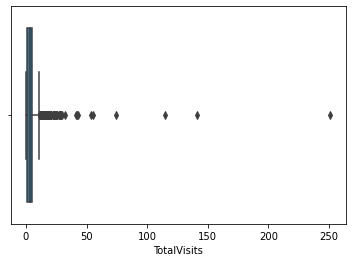

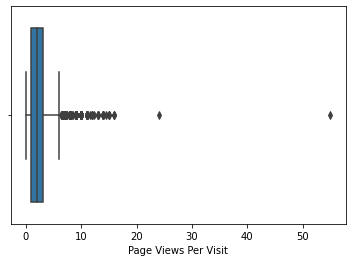

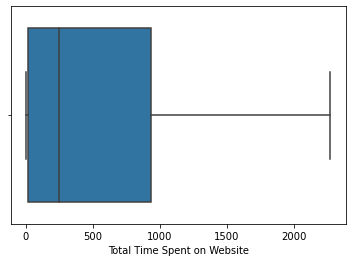

In [66]:
cols=['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

Columns 'TotalVisits' and 'Page Views Per Visit' have outliers but are less in number<bR>
we will cap the outliers at 95th percentile 

In [67]:
q=df['TotalVisits'].quantile(0.95)
q1=df['Page Views Per Visit'].quantile(0.95)
df['TotalVisits'][df['TotalVisits']>q]=q
df['Page Views Per Visit'][df['Page Views Per Visit']>q1]=q1

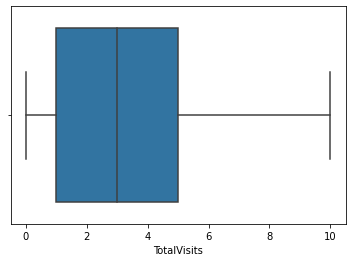

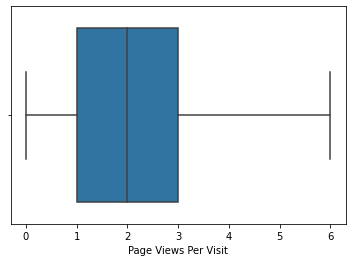

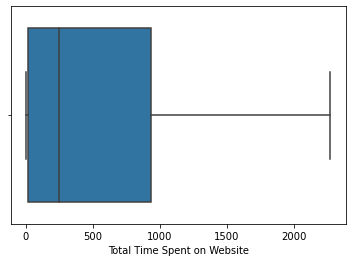

In [68]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### 3.EDA: univariate and bivariate analysis

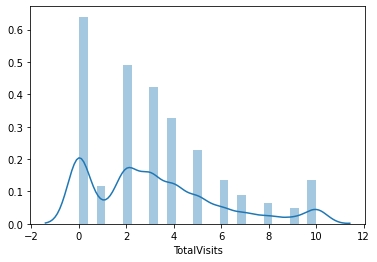

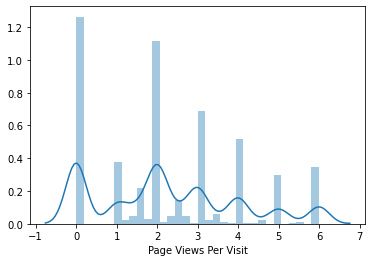

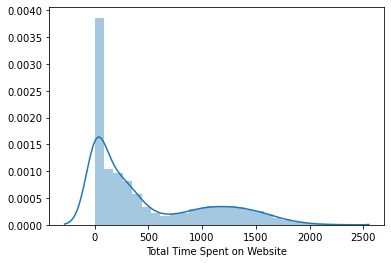

In [69]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

The above distplots tells:
- TotalVisits column is skewed at 0 but it follows a normal distribution after that
- Page Views Per Visit goes down as the number increses
- Total time spent on website is skewed highly at 0 and decreses as it increases.

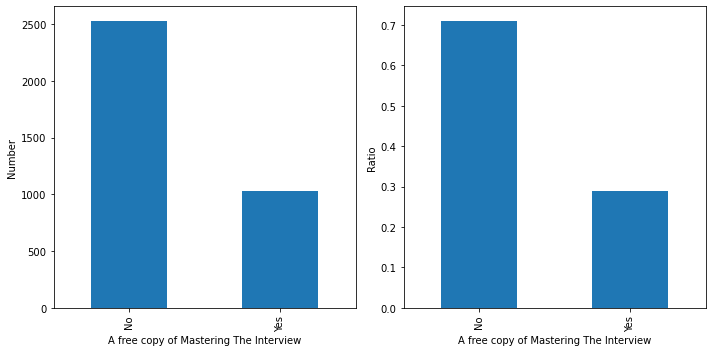

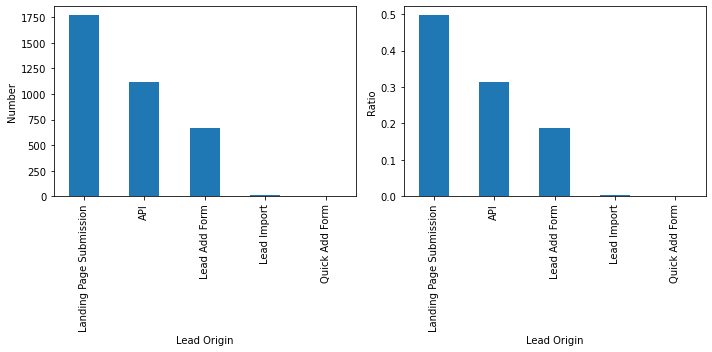

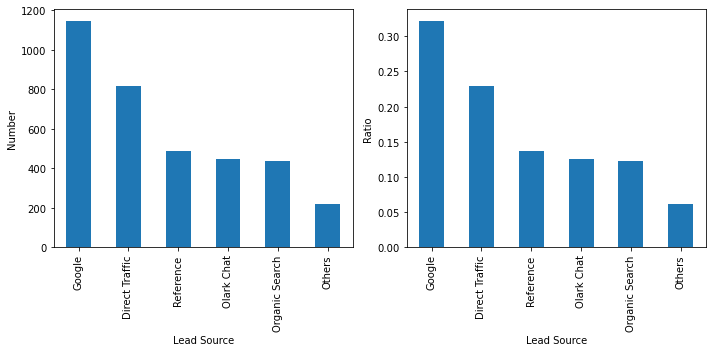

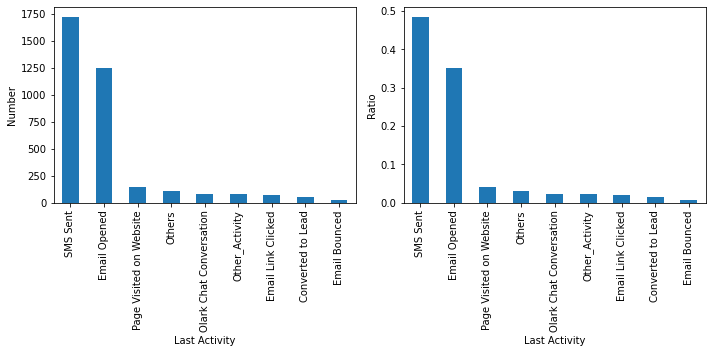

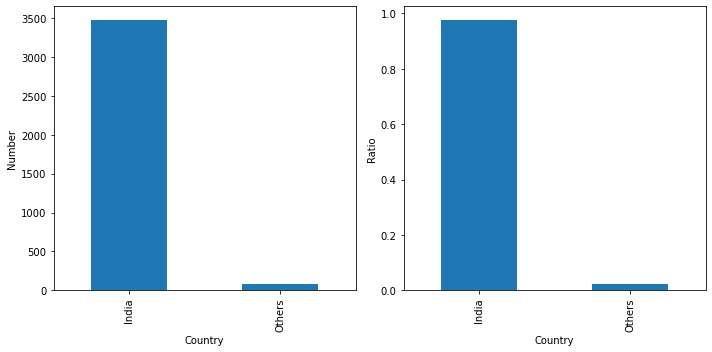

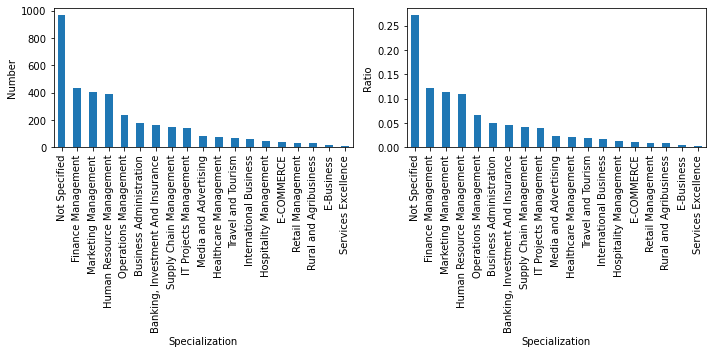

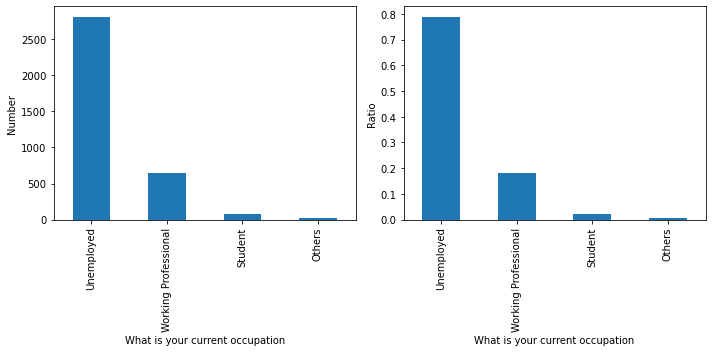

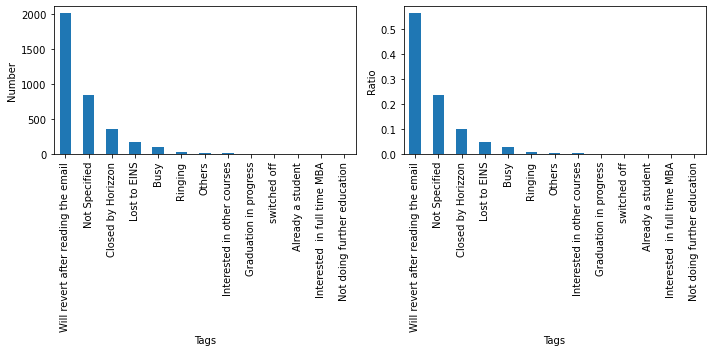

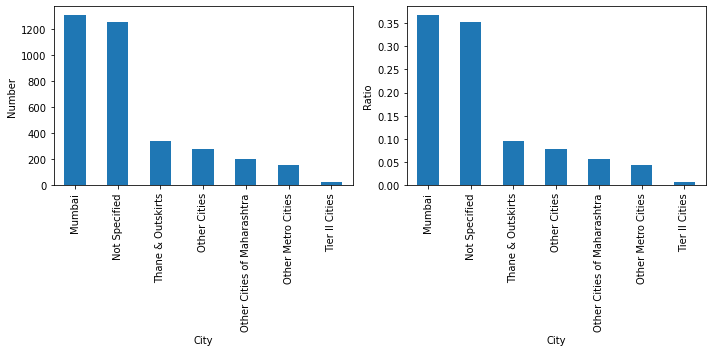

In [70]:
varlist=[ 'A free copy of Mastering The Interview','Lead Origin','Lead Source','Last Activity','Country'
         ,'Specialization','What is your current occupation','Tags','City']
df1=df[df['Converted']==1]
for i in varlist:
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    df1[i].value_counts().plot.bar()
    plt.xticks(rotation=90)
    plt.ylabel("Number")
    plt.xlabel(i)
    plt.subplot(1,2,2)
    df1[i].value_counts(normalize=True).plot.bar()
    plt.xticks(rotation=90)
    plt.ylabel("Ratio")
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

#### inferences:
- There are high number of leads who are converted but selected no's for 'A Free Copy of Maastering the Interviw'
- 'Landing page submission' in Lead origin have highest number of converted leads followed by 'API' and the least converted is 'Quick Add forum'.
- 'Google' in Lead Source have highest number of converted leads.
- SMS sent is last activity of most converted leads and email bounced is least used.
- India has highest number of converted leads because most of the leads are from India.
- 'Finance Management' , 'Marketing Management' , 'Human Resource Management' have highest number of converted leads .
- Unemployed people are mostly interested in this course.
- Most of the converted leads wants to revert after reading the Email.
- Mumbai has the highest number of converted leads and the Tier 2 cities needs to be focused.


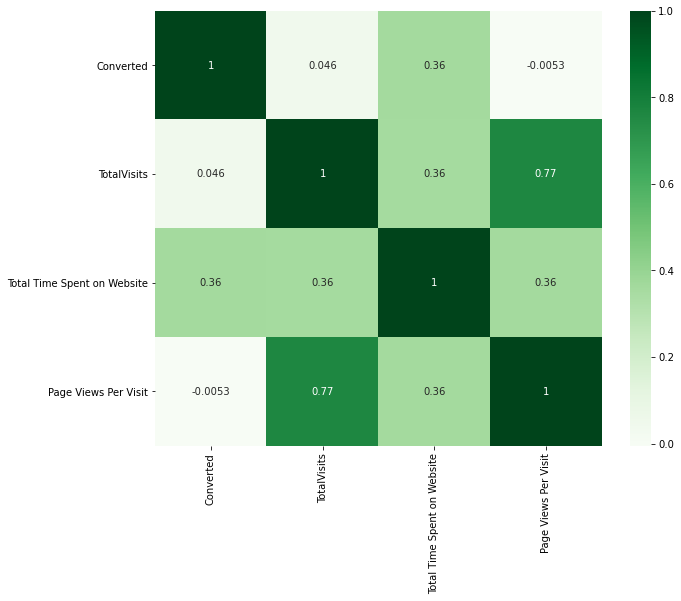

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

#### Inferences:
- Total Visits and Page views per visit have the highest correlation i.e '77%'
- Converted and Page Views Per visit have a negativ correlation of .5%.

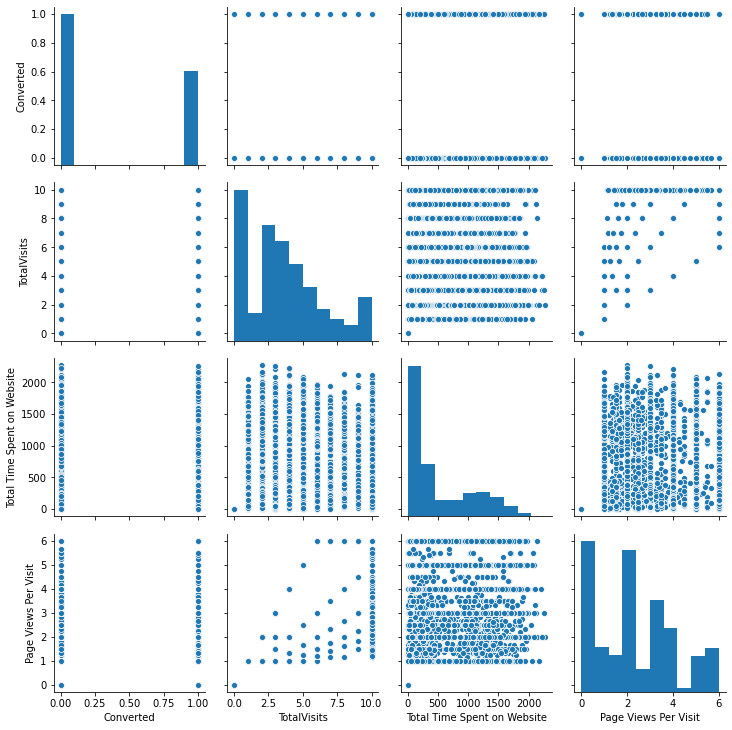

In [72]:
sns.pairplot(df)
plt.show()

#### Inferences:
- Relation between Total Visits and Page views per visit is positive and high.
- No other good relation can be derived between variables by seeing the pairplot.

In [73]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Interested in other courses,Not Specified,No
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Ringing,Not Specified,No
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,No
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No


<b> CONVERTING YES AND NO TO 1 AND 0 FOR ANALYSIS.

In [74]:
varlist=['A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[varlist]=df[varlist].apply(binary_map)

### 4.Creating dummies

In [75]:
dummy=pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'
                        ,'Tags','City']],drop_first=True)

In [76]:
df=pd.concat([df,dummy],axis=1)

In [77]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Interested in other courses,Not Specified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Ringing,Not Specified,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
df.shape

(9240, 70)

DROPPING THE COLUMNS FOR WHICH DUMMIES ARE ALREADY CREATED.

In [79]:
df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation'
                        ,'Tags','City'],axis=1,inplace=True)

In [80]:
df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
660728,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
660681,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                            

THERE ARE 61 VARIABLES AFTER CREATING DUMMIES .


### 5.Train Test Split

In [82]:
X=df.drop(['Converted','Prospect ID'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660727,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660719,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
660681,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [83]:
y=df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6.Scaling

In [85]:
scaler=MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [86]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
597687,0.4,0.214349,0.221667,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
626825,0.5,0.046655,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
587928,0.5,0.541373,0.833333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
622366,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [87]:
conversion=(sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

THERE IS 38.55% OF CONVERSION RATE 

### 7.Building and fitting a model

In [88]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1309.4
Date:                Mon, 08 Mar 2021   Deviance:                       2618.7
Time:                        14:55:32   Pearson chi2:                 1.25e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7225      1.378     -5.603      0.000     -10.424      -5.021
TotalVisits                                              1.3321      0.303      4.400      0.000       0.739       1.925
Total Time Spent on Website                              4.3992      0.250     17.593      0.000       3.909       4.889
Page Views Per Visit                                    -1.2021      0.321     -3.748      0.000      -1.831      -0.573
A free copy of Mastering The Interview                  -0.2823      0.174     -1.626      0.104      -0.623       0.058
Lead Origin_Landing Page Submission                     -0.6783      0.242     -2.806      0.005      -1.152      -0.205
Lead Origin_Lead Add Form                                4.0234      0.574      7.014      0.000       2.899       5.148
Lead Origin_Lead Import                                 -0.8433      0.879     -0.959      0.337      -2.566       0.880
Lead Origin_Quick Add Form                              19.8677   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                       0.1161      0.178      0.651      0.515      -0.233       0.466
Lead Source_Olark Chat                                   0.8430      0.239      3.522      0.000       0.374       1.312
Lead Source_Organic Search                               0.1180      0.205      0.575      0.565      -0.284       0.521
Lead Source_Others                                       0.0715      0.395      0.181      0.856      -0.702       0.845
Lead Source_Reference                                   -3.0559      0.692     -4.414      0.000      -4.413      -1.699
Last Activity_Email Bounced                             -0.4222      0.564     -0.749      0.454      -1.528       0.683
Last Activity_Email Link Clicked                         0.7192      0.494      1.454      0.146      -0.250       1.688
Last Activity_Email Opened                               1.5072      0.372      4.052      0.000       0.778       2.236
Last Activity_Olark Chat Conversation                   -0.2044      0.425     -0.481      0.630      -1.037       0.628
Last Activity_Other_Activity                            -0.1168      0.816     -0.143      0.886      -1.717       1.483
Last Activity_Others                                     1.0512      0.475      2.211      0.027       0.119       1.983
Last Activity_Page Visited on Website                    0.4250      0.427      0.994      0.320      -0.413       1.263
Last Activity_SMS Sent                                   3.1785      0.374      8.498      0.000       2.445       3.912
Specialization_Business Administration                  -0

AFTER FITTING THE MODEL WITH 60 VARIABLES WE CAN SEE THERE HIGH P VALUES AND THE MODEL SEEMS NOT TO BE A GOOD MODEL.,BR.
SO , USING RFE FOR SELECTING THE BEST VARIABLES 

### 8. Feature selection through RFE

In [89]:
logreg = LogisticRegression()


In [90]:
rfe=RFE(logreg,20) # selecting 20 variables
rfe=rfe.fit(X_train,y_train)

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other_Activity', False, 21),
 ('Last Activity_Others', False, 6),
 ('Last Activity_Page Visited on Website', False, 36),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 34),
 ('Spe

In [92]:
col=X_train.columns[rfe.support_]

### 9.Building the model again with RFE selected variables

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.7
Date:                Mon, 08 Mar 2021   Deviance:                       2685.4
Time:                        14:55:35   Pearson chi2:                 9.76e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7979      0.264    -18.165      0.000      -5.316      -4.280
TotalVisits                                              1.1500      0.280      4.106      0.000       0.601       1.699
Total Time Spent on Website                              4.0629      0.228     17.781      0.000       3.615       4.511
Page Views Per Visit                                    -1.4629      0.294     -4.982      0.000      -2.038      -0.887
Lead Origin_Landing Page Submission                     -0.9063      0.130     -6.981      0.000      -1.161      -0.652
Lead Origin_Lead Add Form                                3.5645      0.415      8.580      0.000       2.750       4.379
Lead Source_Reference                                   -3.1380      0.563     -5.573      0.000      -4.242      -2.034
Last Activity_Email Bounced                             -0.6680      0.434     -1.540      0.124      -1.518       0.182
Last Activity_Email Opened                               1.2121      0.142      8.547      0.000       0.934       1.490
Last Activity_SMS Sent                                   2.8808      0.150     19.167      0.000       2.586       3.175
What is your current occupation_Working Professional     0.8542      0.359      2.379      0.017       0.150       1.558
Tags_Busy                                                2.7118      0.312      8.704      0.000       2.101       3.322
Tags_Closed by Horizzon                                  8.6922      1.046      8.312      0.000       6.643      10.742
Tags_Interested  in full time MBA                       -0.6260      0.811     -0.771      0.440      -2.216       0.964
Tags_Interested in other courses                        -0.1869      0.402     -0.465      0.642      -0.975       0.601
Tags_Lost to EINS                                        7.6338      0.765      9.982      0.000       6.135       9.133
Tags_Not Specified                                       1.8548      0.232      7.978      0.000       1.399       2.310
Tags_Not doing further education                        -0.7155      1.042     -0.687      0.492      -2.757       1.326
Tags_Ringing                                            -1.1509      0.312     -3.692      0.000      -1.762      -0.540
Tags_Will revert after reading the email                 6.3557      0.286     22.192      0.000       5.794       6.917
Tags_switched off                                       -1.3768      0.576     -2.389      0.017      -2.506      -0.247
========================================================================================================================
"""

WE CAN CLEARY SEE THERE ARE MANY COLUMNS HAVING HIGH P VALUES WHICH TELLS THE MODEL IS NOT GOOD .<BR>
SO, CHECKING VIFs OF ALL THE VARIABLES FIRST

<b>Checking VIFs

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.54
0,TotalVisits,5.77
4,Lead Origin_Lead Add Form,4.52
5,Lead Source_Reference,4.39
3,Lead Origin_Landing Page Submission,3.27
18,Tags_Will revert after reading the email,2.77
1,Total Time Spent on Website,2.38
8,Last Activity_SMS Sent,2.33
7,Last Activity_Email Opened,2.18
15,Tags_Not Specified,2.00


### 10.Dropping columns with high p-values and VIFs

PAGE VIEWS PER VISIT HAVE VIFs VALUE GREATER THAN 5 WHICH IS NOT GOOD AND SHOW ITS MULTICOLLINERITY WITH OTHER VARIABLES , SO FIRSTLY DROPPING THIS COLUMN.

In [95]:
col = col.drop('Page Views Per Visit',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1355.4
Date:                Mon, 08 Mar 2021   Deviance:                       2710.8
Time:                        14:55:36   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8338      0.264    -18.330      0.000      -5.351      -4.317
TotalVisits                                              0.2243      0.216      1.040      0.298      -0.198       0.647
Total Time Spent on Website                              3.9091      0.224     17.429      0.000       3.470       4.349
Lead Origin_Landing Page Submission                     -1.1294      0.122     -9.290      0.000      -1.368      -0.891
Lead Origin_Lead Add Form                                3.6101      0.412      8.760      0.000       2.802       4.418
Lead Source_Reference                                   -3.0815      0.560     -5.503      0.000      -4.179      -1.984
Last Activity_Email Bounced                             -0.6900      0.437     -1.579      0.114      -1.546       0.166
Last Activity_Email Opened                               1.1718      0.141      8.297      0.000       0.895       1.449
Last Activity_SMS Sent                                   2.7974      0.149     18.808      0.000       2.506       3.089
What is your current occupation_Working Professional     0.8385      0.358      2.342      0.019       0.137       1.540
Tags_Busy                                                2.6520      0.310      8.547      0.000       2.044       3.260
Tags_Closed by Horizzon                                  8.6996      1.043      8.344      0.000       6.656      10.743
Tags_Interested  in full time MBA                       -0.7332      0.820     -0.895      0.371      -2.340       0.873
Tags_Interested in other courses                        -0.3177      0.403     -0.789      0.430      -1.107       0.472
Tags_Lost to EINS                                        7.7058      0.764     10.092      0.000       6.209       9.202
Tags_Not Specified                                       1.8408      0.232      7.934      0.000       1.386       2.296
Tags_Not doing further education                        -0.7632      1.042     -0.733      0.464      -2.805       1.278
Tags_Ringing                                            -1.1827      0.311     -3.805      0.000      -1.792      -0.574
Tags_Will revert after reading the email                 6.2847      0.284     22.103      0.000       5.727       6.842
Tags_switched off                                       -1.3485      0.573     -2.354      0.019      -2.471      -0.226
========================================================================================================================
"""

WE CAN SEE:
'TotalVisits','Last Activity_Email Bounced','Tags_Interested in full time MBA','Tags_Interested in other courses','Tags_Not doing further education' have high p-values and must be removed .but ,before removing the column with highest p-value we will check the VIFs.

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.51
4,Lead Source_Reference,4.39
0,TotalVisits,3.18
2,Lead Origin_Landing Page Submission,2.94
17,Tags_Will revert after reading the email,2.76
1,Total Time Spent on Website,2.35
7,Last Activity_SMS Sent,2.29
6,Last Activity_Email Opened,2.15
14,Tags_Not Specified,1.98
16,Tags_Ringing,1.63


VIFs are below 5 .so. the variable with highest p-value i.e 'Tags_Not doing further education' will be removed.

In [98]:
col = col.drop('Tags_Not doing further education',1)

### 11.Again fitting the model with appropiate variables

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1355.8
Date:                Mon, 08 Mar 2021   Deviance:                       2711.5
Time:                        14:55:36   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8852      0.258    -18.943      0.000      -5.391      -4.380
TotalVisits                                              0.2249      0.216      1.043      0.297      -0.198       0.648
Total Time Spent on Website                              3.9131      0.224     17.445      0.000       3.473       4.353
Lead Origin_Landing Page Submission                     -1.1327      0.122     -9.318      0.000      -1.371      -0.894
Lead Origin_Lead Add Form                                3.6132      0.413      8.759      0.000       2.805       4.422
Lead Source_Reference                                   -3.0824      0.561     -5.498      0.000      -4.181      -1.984
Last Activity_Email Bounced                             -0.6972      0.436     -1.599      0.110      -1.552       0.157
Last Activity_Email Opened                               1.1742      0.141      8.317      0.000       0.898       1.451
Last Activity_SMS Sent                                   2.8015      0.149     18.845      0.000       2.510       3.093
What is your current occupation_Working Professional     0.8425      0.359      2.349      0.019       0.140       1.545
Tags_Busy                                                2.7015      0.306      8.835      0.000       2.102       3.301
Tags_Closed by Horizzon                                  8.7493      1.041      8.403      0.000       6.709      10.790
Tags_Interested  in full time MBA                       -0.6854      0.818     -0.838      0.402      -2.289       0.919
Tags_Interested in other courses                        -0.2695      0.400     -0.674      0.500      -1.053       0.514
Tags_Lost to EINS                                        7.7579      0.762     10.188      0.000       6.265       9.250
Tags_Not Specified                                       1.8899      0.226      8.360      0.000       1.447       2.333
Tags_Ringing                                            -1.1349      0.307     -3.701      0.000      -1.736      -0.534
Tags_Will revert after reading the email                 6.3351      0.279     22.691      0.000       5.788       6.882
Tags_switched off                                       -1.3005      0.571     -2.279      0.023      -2.419      -0.182
========================================================================================================================
"""

WE CAN SEE:
'TotalVisits','Tags_Interested in full time MBA','Tags_Interested in other courses' have high p-values and must be removed .but ,before removing the column with highest p-value we will check the VIFs

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.51
4,Lead Source_Reference,4.39
0,TotalVisits,3.17
2,Lead Origin_Landing Page Submission,2.90
16,Tags_Will revert after reading the email,2.72
1,Total Time Spent on Website,2.34
7,Last Activity_SMS Sent,2.29
6,Last Activity_Email Opened,2.14
14,Tags_Not Specified,1.94
15,Tags_Ringing,1.61


VIFs are below 5 .so. the variable with highest p-value i.e 'Tags_Interested in other courses' will be removed.

In [101]:
col=col.drop('Tags_Interested in other courses',1)

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.0
Date:                Mon, 08 Mar 2021   Deviance:                       2712.0
Time:                        14:55:37   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9724      0.228    -21.855      0.000      -5.418      -4.526
TotalVisits                                              0.2200      0.216      1.021      0.307      -0.202       0.643
Total Time Spent on Website                              3.9117      0.224     17.440      0.000       3.472       4.351
Lead Origin_Landing Page Submission                     -1.1257      0.121     -9.298      0.000      -1.363      -0.888
Lead Origin_Lead Add Form                                3.6184      0.413      8.763      0.000       2.809       4.428
Lead Source_Reference                                   -3.0838      0.561     -5.499      0.000      -4.183      -1.985
Last Activity_Email Bounced                             -0.6957      0.436     -1.595      0.111      -1.551       0.159
Last Activity_Email Opened                               1.1755      0.141      8.331      0.000       0.899       1.452
Last Activity_SMS Sent                                   2.8036      0.149     18.868      0.000       2.512       3.095
What is your current occupation_Working Professional     0.8368      0.357      2.343      0.019       0.137       1.537
Tags_Busy                                                2.7838      0.284      9.808      0.000       2.228       3.340
Tags_Closed by Horizzon                                  8.8338      1.035      8.538      0.000       6.806      10.862
Tags_Interested  in full time MBA                       -0.5994      0.809     -0.741      0.459      -2.186       0.987
Tags_Lost to EINS                                        7.8411      0.753     10.417      0.000       6.366       9.316
Tags_Not Specified                                       1.9745      0.193     10.227      0.000       1.596       2.353
Tags_Ringing                                            -1.0515      0.284     -3.703      0.000      -1.608      -0.495
Tags_Will revert after reading the email                 6.4190      0.254     25.295      0.000       5.922       6.916
Tags_switched off                                       -1.2167      0.558     -2.179      0.029      -2.311      -0.122
========================================================================================================================
"""

WE CAN SEE:
'TotalVisits','Tags_Interested in full time MBA','Last Activity_Email Bounced' have high p-values and must be removed .but ,before removing the column with highest p-value we will check the VIFs

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.50
4,Lead Source_Reference,4.39
0,TotalVisits,3.09
2,Lead Origin_Landing Page Submission,2.90
15,Tags_Will revert after reading the email,2.60
1,Total Time Spent on Website,2.34
7,Last Activity_SMS Sent,2.27
6,Last Activity_Email Opened,2.09
13,Tags_Not Specified,1.86
14,Tags_Ringing,1.55


VIFs are below 5 .so. the variable with highest p-value i.e 'Tags_Interested in full time MBA' will be removed.

In [104]:
col=col.drop('Tags_Interested  in full time MBA', 1)

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm6= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.3
Date:                Mon, 08 Mar 2021   Deviance:                       2712.6
Time:                        14:55:37   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0073      0.224    -22.310      0.000      -5.447      -4.567
TotalVisits                                              0.2169      0.216      1.006      0.314      -0.206       0.640
Total Time Spent on Website                              3.9102      0.224     17.438      0.000       3.471       4.350
Lead Origin_Landing Page Submission                     -1.1250      0.121     -9.294      0.000      -1.362      -0.888
Lead Origin_Lead Add Form                                3.6188      0.413      8.760      0.000       2.809       4.428
Lead Source_Reference                                   -3.0803      0.561     -5.487      0.000      -4.181      -1.980
Last Activity_Email Bounced                             -0.6942      0.436     -1.590      0.112      -1.550       0.161
Last Activity_Email Opened                               1.1747      0.141      8.327      0.000       0.898       1.451
Last Activity_SMS Sent                                   2.8038      0.149     18.870      0.000       2.513       3.095
What is your current occupation_Working Professional     0.8148      0.355      2.298      0.022       0.120       1.510
Tags_Busy                                                2.8198      0.281     10.030      0.000       2.269       3.371
Tags_Closed by Horizzon                                  8.8718      1.034      8.582      0.000       6.846      10.898
Tags_Lost to EINS                                        7.8773      0.752     10.479      0.000       6.404       9.351
Tags_Not Specified                                       2.0107      0.189     10.638      0.000       1.640       2.381
Tags_Ringing                                            -1.0150      0.281     -3.611      0.000      -1.566      -0.464
Tags_Will revert after reading the email                 6.4579      0.250     25.806      0.000       5.967       6.948
Tags_switched off                                       -1.1804      0.557     -2.119      0.034      -2.272      -0.089
========================================================================================================================
"""

WE CAN SEE: 'TotalVisits','Last Activity_Email Bounced' have high p-values and must be removed .but ,before removing the column with highest p-value we will check the VIFs

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.50
4,Lead Source_Reference,4.39
0,TotalVisits,3.08
2,Lead Origin_Landing Page Submission,2.89
14,Tags_Will revert after reading the email,2.57
1,Total Time Spent on Website,2.34
7,Last Activity_SMS Sent,2.27
6,Last Activity_Email Opened,2.08
12,Tags_Not Specified,1.84
13,Tags_Ringing,1.54


VIFs are below 5 .so. the variable with highest p-value i.e 'TotalVisits' will be removed.

In [107]:
col=col.drop('TotalVisits',1)

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm7= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.8
Date:                Mon, 08 Mar 2021   Deviance:                       2713.6
Time:                        14:55:38   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9709      0.221    -22.462      0.000      -5.405      -4.537
Total Time Spent on Website                              3.9657      0.218     18.217      0.000       3.539       4.392
Lead Origin_Landing Page Submission                     -1.0826      0.113     -9.546      0.000      -1.305      -0.860
Lead Origin_Lead Add Form                                3.5970      0.413      8.705      0.000       2.787       4.407
Lead Source_Reference                                   -3.0874      0.562     -5.492      0.000      -4.189      -1.986
Last Activity_Email Bounced                             -0.7147      0.434     -1.647      0.100      -1.565       0.136
Last Activity_Email Opened                               1.1734      0.141      8.324      0.000       0.897       1.450
Last Activity_SMS Sent                                   2.7968      0.148     18.863      0.000       2.506       3.087
What is your current occupation_Working Professional     0.8041      0.354      2.271      0.023       0.110       1.498
Tags_Busy                                                2.8248      0.282     10.031      0.000       2.273       3.377
Tags_Closed by Horizzon                                  8.8995      1.033      8.612      0.000       6.874      10.925
Tags_Lost to EINS                                        7.8707      0.752     10.469      0.000       6.397       9.344
Tags_Not Specified                                       2.0145      0.189     10.649      0.000       1.644       2.385
Tags_Ringing                                            -1.0091      0.281     -3.587      0.000      -1.560      -0.458
Tags_Will revert after reading the email                 6.4666      0.250     25.839      0.000       5.976       6.957
Tags_switched off                                       -1.1710      0.557     -2.102      0.036      -2.263      -0.079
========================================================================================================================
"""

<b>THE MODEL IS PERFECT AND ALL THE P-VALUES ARE UNDER 0.05 .<BR>
    CHECKING THE VIFs AGAIN 

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,4.49
3,Lead Source_Reference,4.39
13,Tags_Will revert after reading the email,2.52
1,Lead Origin_Landing Page Submission,2.38
6,Last Activity_SMS Sent,2.27
0,Total Time Spent on Website,2.18
5,Last Activity_Email Opened,2.06
11,Tags_Not Specified,1.76
12,Tags_Ringing,1.50
9,Tags_Closed by Horizzon,1.43


<B> ALL THE VIFs ARE UNDER 5 . SO , THE MODEL IS PERFECT.

<b> Final Model is <font size='5'>`logm7`

In [110]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.008110
597687    0.117583
626825    0.009742
587928    0.107282
622366    0.143933
613574    0.998689
628456    0.003202
588051    0.997092
649586    0.177427
592598    0.999108
dtype: float64

Creating Dataframe for the probablities

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,index
0,0,0.008110,641410
1,0,0.117583,597687
2,0,0.009742,626825
3,0,0.107282,587928
4,0,0.143933,622366


### 12.Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

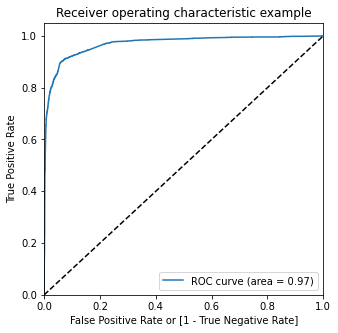

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

AUC(AREA UNDER CURVE) IN THE ROC IS `0.97` WHICH IS VERY GOOD AND WE HAVE PREDICTED THE PROBALITIES RIGHT.

### 13.Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,index,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008110,641410,1,0,0,0,0,0,0,0,0,0
1,0,0.117583,597687,1,1,0,0,0,0,0,0,0,0
2,0,0.009742,626825,1,0,0,0,0,0,0,0,0,0
3,0,0.107282,587928,1,1,0,0,0,0,0,0,0,0
4,0,0.143933,622366,1,1,0,0,0,0,0,0,0,0


In [116]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.840909  0.976886  0.757121
0.2   0.2  0.892239  0.936740  0.864818
0.3   0.3  0.914502  0.914842  0.914293
0.4   0.4  0.923779  0.900649  0.938031
0.5   0.5  0.915121  0.849554  0.955522
0.6   0.6  0.912801  0.825629  0.966517
0.7   0.7  0.907081  0.793998  0.976762
0.8   0.8  0.900588  0.767640  0.982509
0.9   0.9  0.879716  0.699513  0.990755


SEEING AT THE SENSITIVITY,ACCURACY AND SPECIFICITY WE CAN SAY THAT `0.3` IS OPTIMAL CUTOFF POINT AS IT IS THE POINT WHERE ALL THE THREE ARE EQUAL.

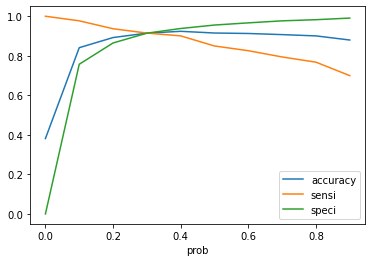

In [117]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

SEEING THE GRAPH THE OPTIMAL CUTOFF POINT IS `0.3`

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,index,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.008110,641410,1,0,0,0,0,0,0,0,0,0,0
1,0,0.117583,597687,1,1,0,0,0,0,0,0,0,0,0
2,0,0.009742,626825,1,0,0,0,0,0,0,0,0,0,0
3,0,0.107282,587928,1,1,0,0,0,0,0,0,0,0,0
4,0,0.143933,622366,1,1,0,0,0,0,0,0,0,0,0


#### Accuracy Score

In [119]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9145021645021645

accuracy on train set is 91% which is very good.

#### Confusion Metrix

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3659,  343],
       [ 210, 2256]], dtype=int64)

true positive-2256
true negatives-3659
false positives-343
false negatives-210

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [122]:
TP / float(TP+FN)

0.9148418491484185

True positive rate is 91% on train set which is very good 

#### Specificity

In [123]:
TN / float(TN+FP)

0.9142928535732134

True negative rate is also 91% on train set.

#### false postive rate

In [124]:
print(FP/ float(TN+FP))

0.0857071464267866


#### Positive predicted values

In [125]:
print (TP / float(TP+FP))

0.8680261639091958


#### Negative predicted values

In [126]:
print (TN / float(TN+ FN))

0.9457224088911863


### Performing on Test Set

Transforming the scaler on test data.

In [127]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [128]:
X_test_sm = sm.add_constant(X_test[col]) #adding constant to test set

Making prediction on test set.

In [129]:
y_test_pred=res.predict(X_test_sm) 

In [130]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['index'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,index
0,1,0.832721,619003
1,1,0.991854,636884
2,1,0.917044,590281
3,0,0.006889,579892
4,1,0.960024,617929


In [131]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_test_pred_final.head()

,Converted,Converted_Prob,index,final_predicted
0,1,0.832721,619003,1
1,1,0.991854,636884,1
2,1,0.917044,590281,1
3,0,0.006889,579892,0
4,1,0.960024,617929,1


#### Accuracy Test

In [132]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.9202741702741702

Accuracy on test set is 92% which shows  the model is good.

#### Confusion Metrix

In [133]:
confusion3= metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion3

array([[1531,  146],
       [  75, 1020]], dtype=int64)

true positive -1020
true negatives-1531
alse positives-146
false negatives-75

In [134]:
TP1 = confusion3[1,1] # true positive 
TN1 = confusion3[0,0] # true negatives
FP1 = confusion3[0,1] # false positives
FN1 = confusion3[1,0] # false negatives

#### Sensitivity

In [135]:
TP1 / float(TP1+FN1)

0.9315068493150684

True posituve rate on test set 91% which shows the model is very good.

#### Specificity

In [136]:
TN1 / float(TN1+FP1)

0.9129397734048896

True negative rate on test set 91% which shows the model is very good.

#### false postive rate

In [137]:
print(FP1/ float(TN1+FP1))

0.08706022659511031


#### Positive predicted values

In [138]:
print (TP1 / float(TP1+FP1))

0.8747855917667239


#### Negative predicted values

In [139]:
print (TN1 / float(TN1+ FN1))

0.9533001245330013


### Lead score for everyone

To find lead score i will multiply the probablity of every lead with 100 after concatinating the `y_test_pred_final` and `y_trai_pred_final`.

In [140]:
y_train_pred_final=y_train_pred_final[['Converted','Converted_Prob','index','final_predicted']]

In [141]:
final=pd.concat([y_train_pred_final,y_test_pred_final])

In [142]:
final.shape

(9240, 4)

In [143]:
final['Lead Scores']=final['Converted_Prob']*100

In [144]:
final=final.sort_values('Lead Scores',ascending=False)
final.set_index('index',inplace=True)

In [145]:
final.head(20)

,Converted,Converted_Prob,final_predicted,Lead Scores
index,,,,
621078,1,0.999985,1,99.998544
636860,1,0.999970,1,99.996980
645398,1,0.999967,1,99.996711
624348,1,0.999967,1,99.996711
585646,1,0.999967,1,99.996711
628121,1,0.999967,1,99.996711
613818,1,0.999967,1,99.996711
634731,1,0.999967,1,99.996711
650338,1,0.999966,1,99.996592


## Thankyou